# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Mar-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 1 -  focus on all dependence forming medications and indications over time within patients identified as being registered at a GP practice within the research period.

In [11]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

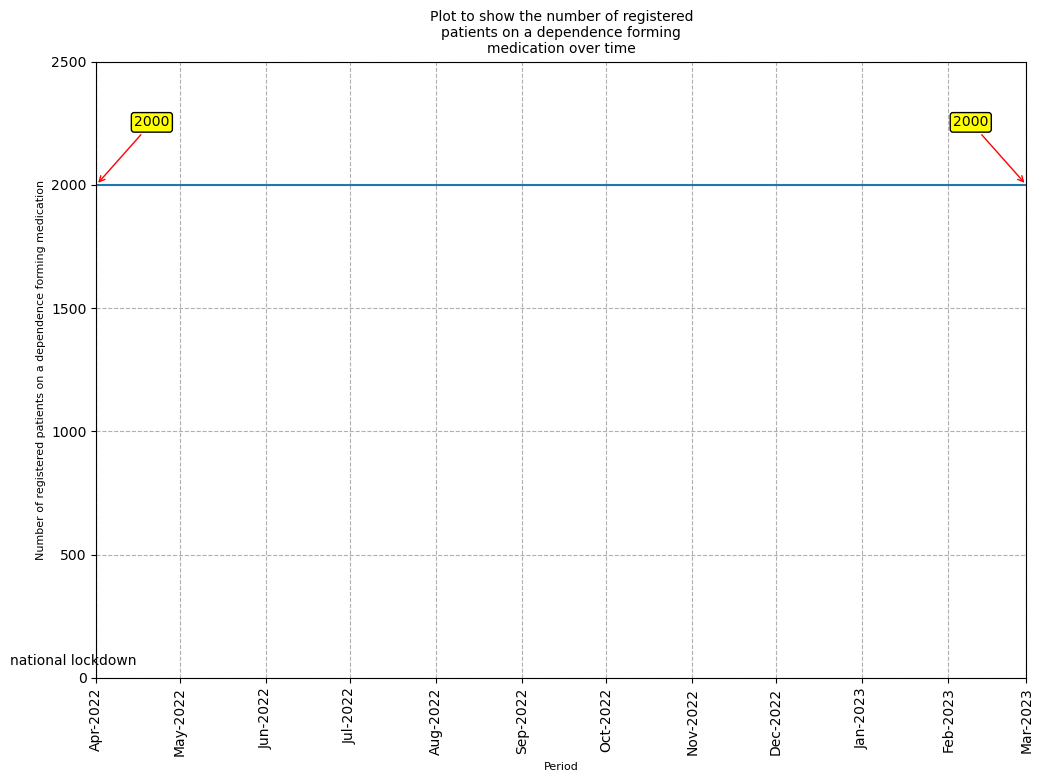

In [12]:
data_measure_medication_rate=pd.read_csv("../output/measure_dfm_medications_by_sex_rate.csv", usecols=["date", "research_population", "population"], parse_dates=["date"])
df_measure_medication_rate=data_measure_medication_rate.groupby(["date"], as_index=False)["research_population"].sum()
x1=df_measure_medication_rate["date"]
y1=df_measure_medication_rate["research_population"]
plt.figure(figsize=(12,8), dpi=100)
plt.plot(x1, y1)
plt.ylabel('Number of registered patients on a dependence forming medication', fontsize=8)
plt.xlabel('Period', fontsize=8)
title = 'Plot to show the number of registered patients on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,40)), fontsize=10)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2022-04-01")],
        ymin=0,
        ymax=2500,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.annotate('national lockdown', xy =("2022-04-01", 50),
                xytext =("2022-03-01", 50))
plt.annotate(f"{y1.iloc[0]:0.0f}", xy=(x1.iloc[0], y1.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{y1.iloc[-1]:0.0f}", xy=(x1.iloc[-1], y1.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))
plt.ylim(ymin=0, ymax=2500)
plt.xticks(rotation=90)
plt.margins(x=0)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_medication_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()

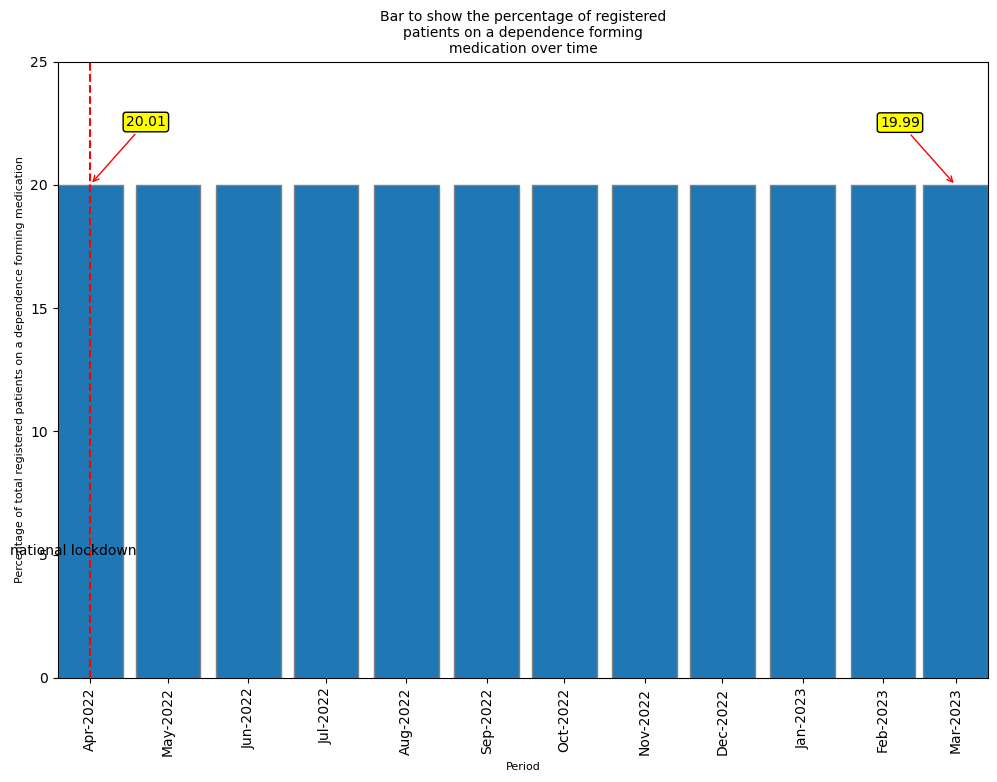

In [13]:
data_measure_medication_rate=pd.read_csv("../output/measure_dfm_medications_by_sex_rate.csv", usecols=["date", "research_population", "value", "population"], parse_dates=["date"])
data_measure_medication_rate['value'] = 100 * data_measure_medication_rate['value']
df_measure_medication_rate=data_measure_medication_rate.groupby(["date"], as_index=False)["value"].mean()
x1=df_measure_medication_rate["date"]
y1=df_measure_medication_rate["value"]
plt.figure(figsize=(12,8), dpi=100)
plt.bar(x1, y1, width=25, edgecolor='grey')
plt.ylabel('Percentage of total registered patients on a dependence forming medication', fontsize=8)
plt.xlabel('Period', fontsize=8)
title = 'Bar to show the percentage of registered patients on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,40)), fontsize=10)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2022-04-01")],
        ymin=0,
        ymax=25,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.annotate('national lockdown', xy =("2022-04-01", 5),
                xytext =("2022-03-01", 5))
plt.annotate(f"{y1.iloc[0]:0.2f}", xy=(x1.iloc[0], y1.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{y1.iloc[-1]:0.2f}", xy=(x1.iloc[-1], y1.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))
plt.ylim(ymin=0, ymax=25)
plt.xticks(rotation=90)
plt.margins(x=0)
plt.savefig(f"../output/measure_medication_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

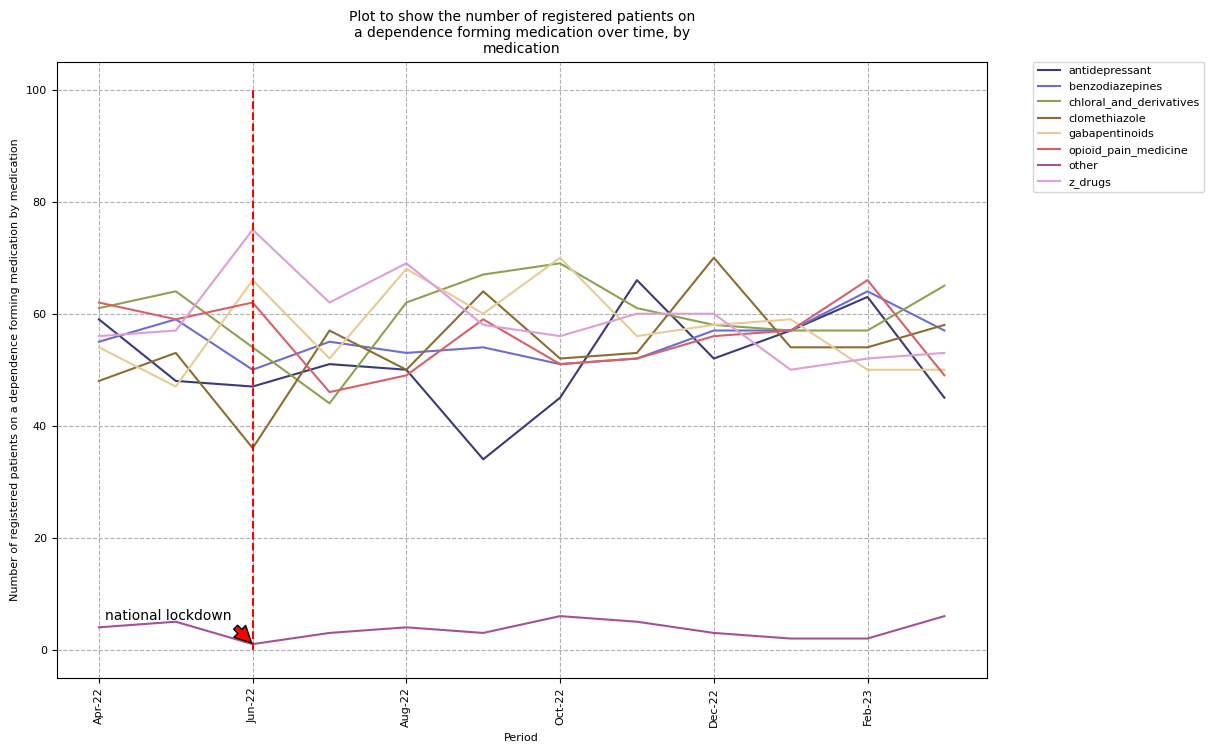

In [14]:
data_measure_dfm_medications_grouped_rate = pd.read_csv("../output/measure_dfm_medications_grouped_rate.csv", parse_dates=["date"])
data_filtered=data_measure_dfm_medications_grouped_rate.loc[data_measure_dfm_medications_grouped_rate["medication"].notnull(), :]
df_measure_dfm_medications_grouped_rate = pd.DataFrame.pivot(data_filtered, index='date', columns='medication', values='research_population')
df_measure_dfm_medications_grouped_rate.index = pd.to_datetime(df_measure_dfm_medications_grouped_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_grouped_rate.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_grouped_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()



In [15]:
print(tabulate(df_measure_dfm_medications_grouped_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_grouped_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Apr-22                59                 55                         61               48                54                      62        4         56
date      antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Mar-23                45                 57                         65               58                50                      49        6         53


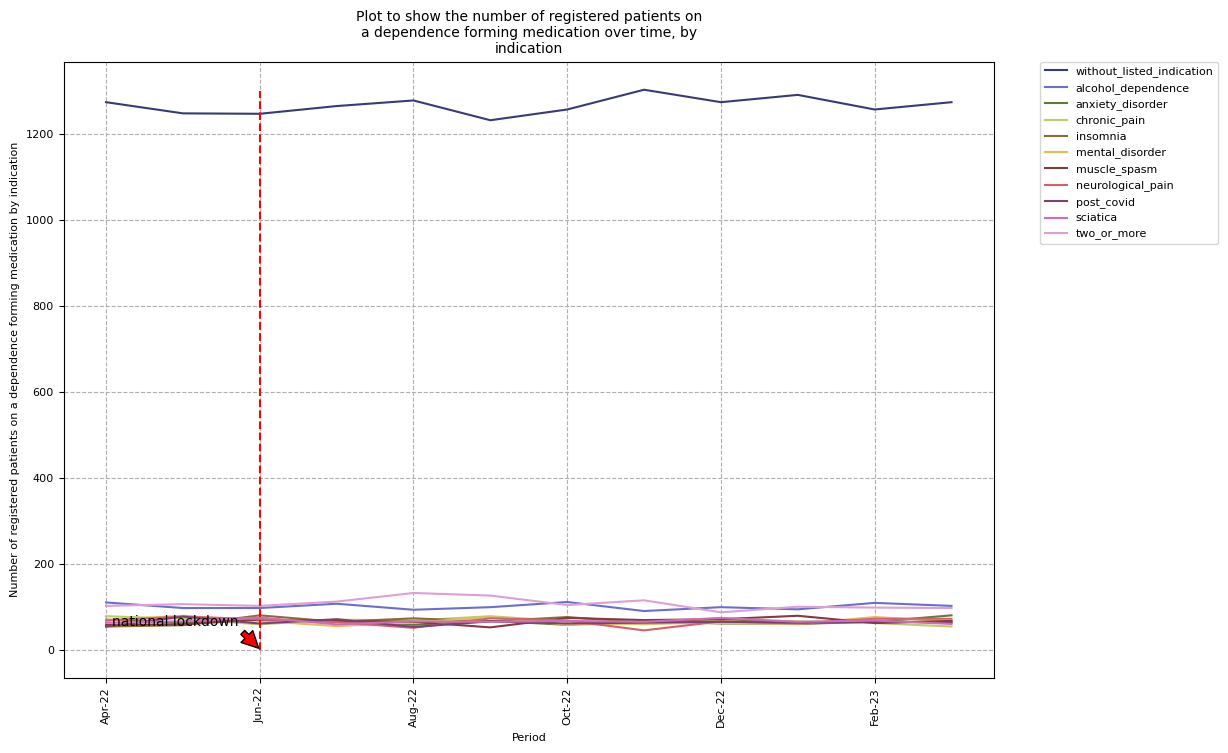

In [32]:
data_measure_dfm_indications_grouped_rate = pd.read_csv("../output/measure_dfm_indications_grouped_rate.csv", parse_dates=["date"])
#data_filtered=data_measure_dfm_indications_grouped_rate.loc[data_measure_dfm_indications_grouped_rate["indication"] != '0', :]
df_measure_dfm_indications_grouped_rate = pd.DataFrame.pivot(data_measure_dfm_indications_grouped_rate, index='date', columns='indication', values='research_population')
df_measure_dfm_indications_grouped_rate.index = pd.to_datetime(df_measure_dfm_indications_grouped_rate.index).strftime('%b-%y')
ax = df_measure_dfm_indications_grouped_rate.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by indication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1300,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.legend(labels= ["without_listed_indication", "alcohol_dependence", "anxiety_disorder", "chronic_pain", "insomnia", "mental_disorder", "muscle_spasm", "neurological_pain", "post_covid", "sciatica", "two_or_more"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_indications_grouped_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()


In [17]:
print(tabulate(df_measure_dfm_indications_grouped_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_indications_grouped_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0    alcohol_dependence    anxiety_disorder    chronic_pain    insomnia    mental_disorder    muscle_spasm    neurological_pain    post_covid    sciatica    two_or_more
------  ----  --------------------  ------------------  --------------  ----------  -----------------  --------------  -------------------  ------------  ----------  -------------
Apr-22  1274                   110                  70              78          54                 69              58                   68            54          63            102
date       0    alcohol_dependence    anxiety_disorder    chronic_pain    insomnia    mental_disorder    muscle_spasm    neurological_pain    post_covid    sciatica    two_or_more
------  ----  --------------------  ------------------  --------------  ----------  -----------------  --------------  -------------------  ------------  ----------  -------------
Mar-23  1274                   102                  80              54          65                 6

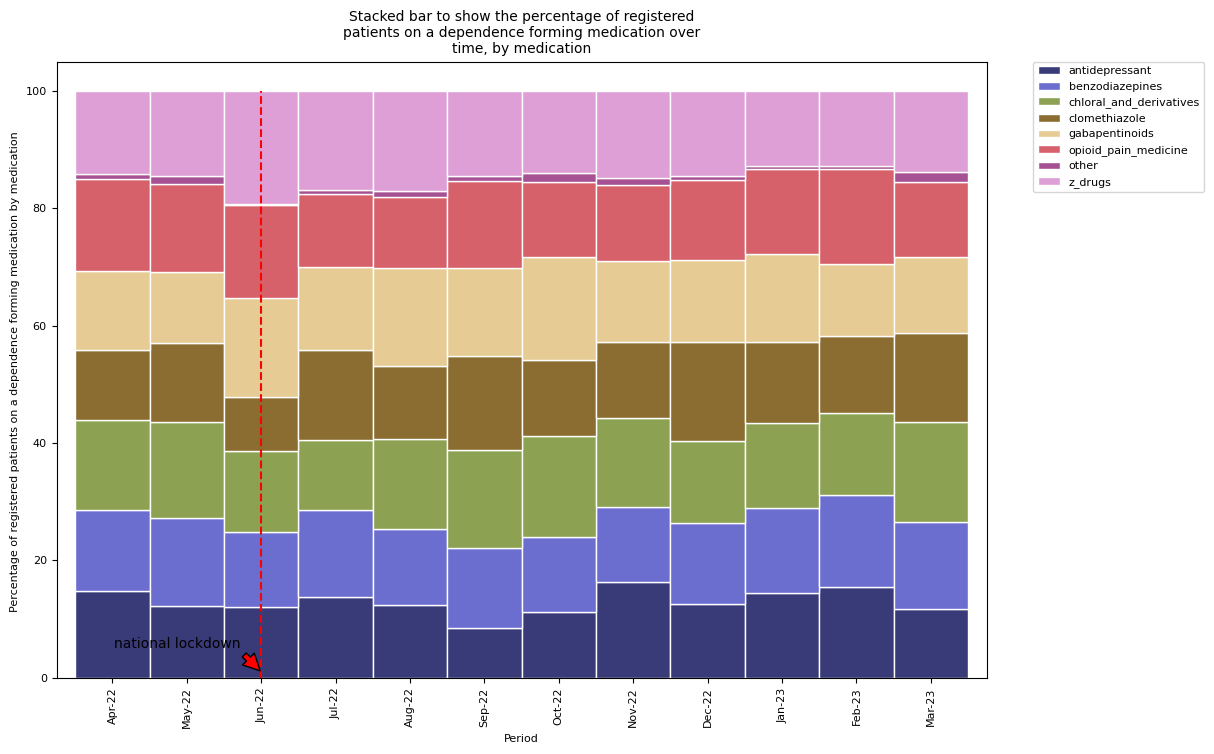

In [18]:
df_med_stacked = pd.DataFrame(df_measure_dfm_medications_grouped_rate)
df_med_stacked.head()
totm = df_med_stacked.sum(axis=1)
perm = df_med_stacked.div(totm, axis=0).mul(100).round(2)
ax = perm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by medication ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
# for bars in ax.containers:
    # ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_grouped_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()



In [19]:
print(tabulate(perm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Apr-22             14.79              13.78                      15.29            12.03             13.53                   15.54        1      14.04
date      antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Mar-23             11.75              14.88                      16.97            15.14             13.05                   12.79     1.57      13.84


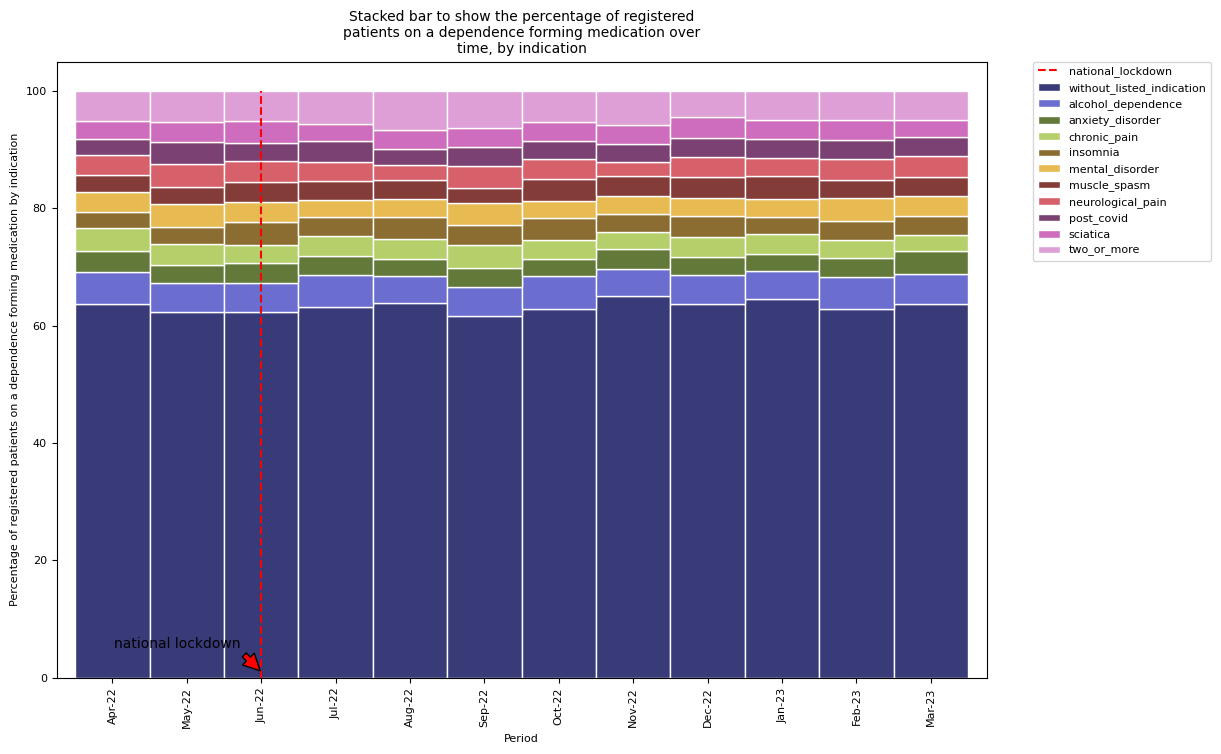

In [25]:
df_ind_stacked = pd.DataFrame(df_measure_dfm_indications_grouped_rate)
df_ind_stacked.head()
toti = df_ind_stacked.sum(axis=1)
peri = df_ind_stacked.div(toti, axis=0).mul(100).round(2)
ax = peri.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by indication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.legend(labels= ["national_lockdown", "without_listed_indication", "alcohol_dependence", "anxiety_disorder", "chronic_pain", "insomnia", "mental_disorder", "muscle_spasm", "neurological_pain", "post_covid", "sciatica", "two_or_more"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_indications_grouped_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

In [21]:
print(tabulate(peri.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peri.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0    alcohol_dependence    anxiety_disorder    chronic_pain    insomnia    mental_disorder    muscle_spasm    neurological_pain    post_covid    sciatica    two_or_more
------  ----  --------------------  ------------------  --------------  ----------  -----------------  --------------  -------------------  ------------  ----------  -------------
Apr-22  63.7                   5.5                 3.5             3.9         2.7               3.45             2.9                  3.4           2.7        3.15            5.1
date       0    alcohol_dependence    anxiety_disorder    chronic_pain    insomnia    mental_disorder    muscle_spasm    neurological_pain    post_covid    sciatica    two_or_more
------  ----  --------------------  ------------------  --------------  ----------  -----------------  --------------  -------------------  ------------  ----------  -------------
Mar-23  63.7                   5.1                   4             2.7        3.25                3.